In [5]:
%cd ../dmyplant2
!git pull --rebase

/Users/dieterchvatal/Documents/Anaconda/dmyplant2
Bereits aktuell.


In [9]:
%cd ../dReliaCalc
import dmyplant2
import pandas as pd
import numpy as np
from pprint import pprint as pp

/Users/dieterchvatal/Documents/Anaconda/dReliaCalc


In [10]:
dval = pd.read_csv("input.csv",sep=';', encoding='utf-8')
dval['val start'] = pd.to_datetime(dval['val start'], format='%d.%m.%Y')

In [69]:
from dmyplant2 import cred
mp = dmyplant2.MyPlant(7200)
vl = dmyplant2.Validation(mp,dval, cui_log=True)                   

00 1145166 M02 POLYNT - 2 (1145166- ..
01 1175579 M05 REGENSBURG             
02 1184199 M01 ROCHE PENZBERG KWKK    
03 1198719 M02 ECOGEN ENERGY SYSTEM ..
04 1243360 M03 BMW REGENSBURG M3      
05 1243362 M02 REGENSBURG             
06 1250575 M01 ABINSK                 
07 1250578 M01 PROSPERITY WEAVING M ..
08 1310773 M01 SOTERNIX RENOVE        
09 1319133 M04 BMW MÜNCHEN            
10 1319138 M02 BMW MÜNCHEN            
11 1319151 M01 BMW MÜNCHEN            
12 1319157 M03 BMW MÜNCHEN            
13 1319997 M02 BMW MÜNCHEN            
14 1320022 M01 BMW MÜNCHEN            
15 1320030 M03 BMW MÜNCHEN            
16 1320072 M04 BMW LANDSHUT 4.10      
17 1320090 M01 BMW LANDSHUT M1        
18 1320114 M03 BMW LANDSHUT 4.10      
19 1325927 M01 LES COURONNERIES       
20 1339812 M01 DALOMA                 
21 1345851 M03 GAZ DE LACQ            
22 1352268 M06 BMW DINGOLFING 2.4     
23 1352323 M07 BMW DINGOLFING 2.4     
24 1361965 M01 FRONERI - FERENTINO    
25 1364066 M01 TOM VILLE 

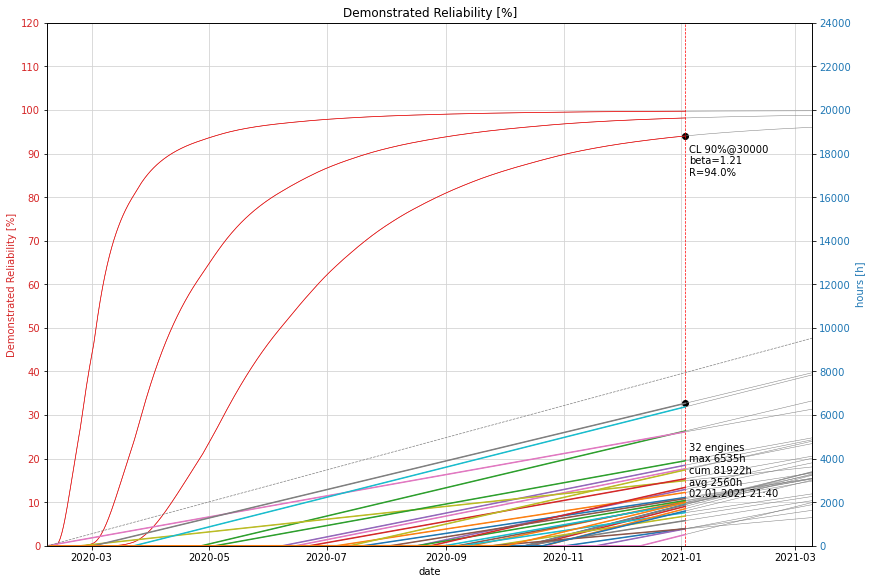

In [70]:
failures = pd.DataFrame([])
dmyplant2.demonstrated_Reliabillity_Plot(vl, 
            beta=1.21, T=30000, s=1000, ft=failures, cl=[10,50,90], factor=1.2)

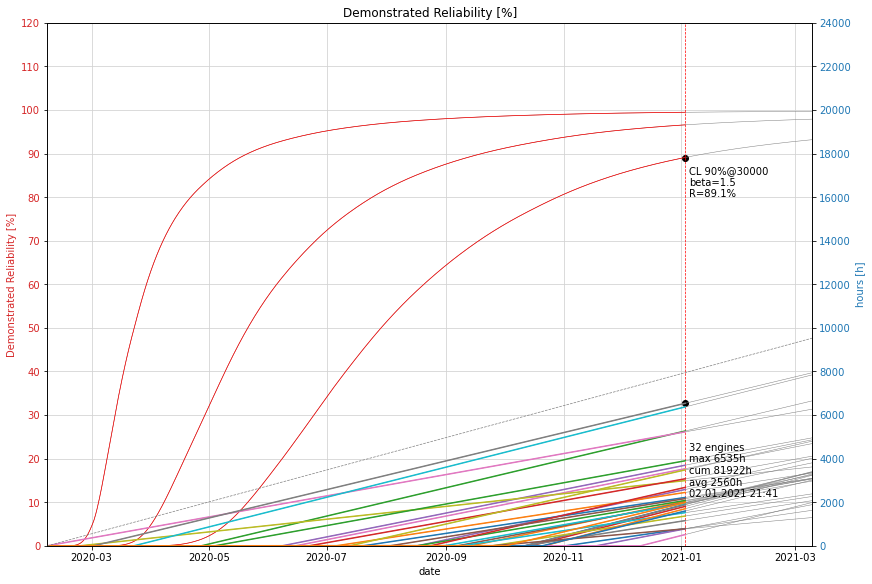

In [71]:
dmyplant2.demonstrated_Reliabillity_Plot(vl, 
            beta=1.5, T=30000, s=1000, ft=failures, cl=[10,50,90], factor=1.2)

In [72]:
d=vl.dashboard
d.columns

Index(['Name', 'Engine ID', 'Design Number', 'Engine Type', 'Engine Version',
       'P', 'serialNumber', 'id', 'Count_OpHour', 'val start', 'oph@start',
       'oph parts'],
      dtype='object')

<AxesSubplot:>

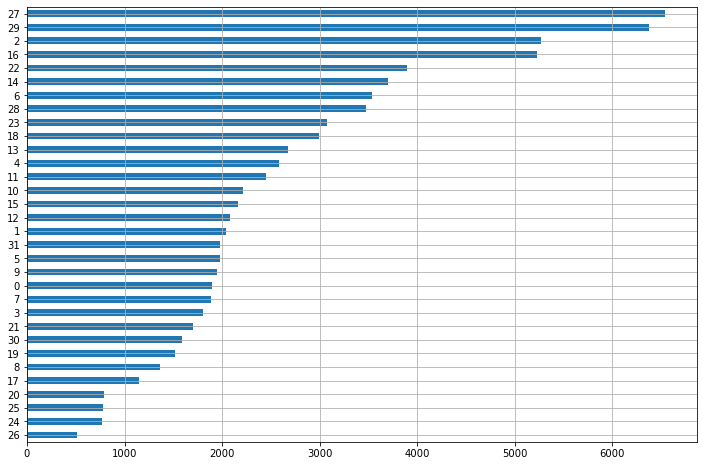

In [73]:
#d.plot.area(figsize=(12,4),subplots=True)
d.sort_values(by = "oph parts",ascending=True)["oph parts"].plot.barh(figsize=(12,8),grid=True)

In [74]:
d['oph parts'].describe()

count      32.000000
mean     2560.062500
std      1537.382819
min       512.000000
25%      1671.750000
50%      2058.500000
75%      3173.750000
max      6535.000000
Name: oph parts, dtype: float64

In [75]:
d.groupby( "Engine Type")['oph parts'].describe()

,count,mean,std,min,25%,50%,75%,max
Engine Type,,,,,,,,
612,1.0,788.000000,NaN,788.0,788.00,788.0,788.00,788.0
616,7.0,1747.714286,567.366053,774.0,1530.50,1804.0,2007.50,2580.0
620,6.0,2639.333333,1918.164922,780.0,1977.50,2147.5,2388.75,6371.0
624,18.0,2948.000000,1579.938941,512.0,1884.75,2833.5,3654.75,6535.0


In [76]:
d.groupby( "Engine Version")['oph parts'].describe()

,count,mean,std,min,25%,50%,75%,max
Engine Version,,,,,,,,
F01,5.0,2144.800000,194.878680,1944.0,2039.00,2078.0,2217.00,2446.0
F11,1.0,1363.000000,NaN,1363.0,1363.00,1363.0,1363.00,1363.0
F12,1.0,1804.000000,NaN,1804.0,1804.00,1804.0,1804.00,1804.0
H01,12.0,3108.000000,1664.079161,512.0,2096.25,3031.0,3745.75,6535.0
H02,1.0,5264.000000,NaN,5264.0,5264.00,5264.0,5264.00,5264.0
H12,1.0,1518.000000,NaN,1518.0,1518.00,1518.0,1518.00,1518.0
J01,2.0,2278.000000,427.092496,1976.0,2127.00,2278.0,2429.00,2580.0
J101,1.0,6371.000000,NaN,6371.0,6371.00,6371.0,6371.00,6371.0
J11,1.0,774.000000,NaN,774.0,774.00,774.0,774.00,774.0


In [77]:
import datetime
datetime.datetime.now()
import arrow

In [78]:
for i, e in enumerate(vl.engines):
    print(f"{i:02d} {e} {e.historical_dataItem(161, pd.to_datetime('1.9.2020', format='%d.%m.%Y').timestamp())} oph")


00 1145166 M02 POLYNT - 2 (1145166- .. 30981.0 oph
01 1175579 M05 REGENSBURG              30319.0 oph
02 1184199 M01 ROCHE PENZBERG KWKK     27681.0 oph
03 1198719 M02 ECOGEN ENERGY SYSTEM .. 28050.0 oph
04 1243360 M03 BMW REGENSBURG M3       64106.0 oph


ERROR:root: Code: /asset/157701/dataitem/161?timestamp=1598918400000, 404, No data was found


05 1243362 M02 REGENSBURG              None oph
06 1250575 M01 ABINSK                  1367.0 oph


ERROR:root: Code: /asset/158705/dataitem/161?timestamp=1598918400000, 404, No data was found


07 1250578 M01 PROSPERITY WEAVING M .. None oph
08 1310773 M01 SOTERNIX RENOVE         18207.0 oph
09 1319133 M04 BMW MÜNCHEN             4630.0 oph
10 1319138 M02 BMW MÜNCHEN             4631.0 oph
11 1319151 M01 BMW MÜNCHEN             4627.0 oph
12 1319157 M03 BMW MÜNCHEN             4637.0 oph
13 1319997 M02 BMW MÜNCHEN             5121.0 oph
14 1320022 M01 BMW MÜNCHEN             5173.0 oph
15 1320030 M03 BMW MÜNCHEN             5747.0 oph
16 1320072 M04 BMW LANDSHUT 4.10       9134.0 oph
17 1320090 M01 BMW LANDSHUT M1         8035.0 oph
18 1320114 M03 BMW LANDSHUT 4.10       8039.0 oph
19 1325927 M01 LES COURONNERIES        9804.0 oph
20 1339812 M01 DALOMA                  5246.0 oph
21 1345851 M03 GAZ DE LACQ             7248.0 oph
22 1352268 M06 BMW DINGOLFING 2.4      7210.0 oph
23 1352323 M07 BMW DINGOLFING 2.4      7057.0 oph
24 1361965 M01 FRONERI - FERENTINO     5883.0 oph
25 1364066 M01 TOM VILLE               1.0 oph
26 1386147 M06 ABINSK                  7262.0 oph
27 1

In [79]:
d_subset=d.groupby('Engine Type').head(100)
d_subset.pivot(columns='Engine Type',values='Engine Version').fillna('')

Engine Type,612,616,620,624
0,,,,H01
1,,F01,,
2,,,,H02
3,,F12,,
4,,J01,,
5,,J01,,
6,,,,K01
7,,,,K505
8,,F11,,
9,,,F01,


In [80]:
d_subset.pivot_table(index='Engine Version', columns='Engine Type', values='oph parts', aggfunc='sum', margins=True).fillna('')

Engine Type,612,616,620,624,All
Engine Version,,,,,
F01,,2039,8685,,10724.0
F11,,1363,,,1363.0
F12,,1804,,,1804.0
H01,,,,37296,37296.0
H02,,,,5264,5264.0
H12,,,,1518,1518.0
J01,,4556,,,4556.0
J101,,,6371,,6371.0
J11,,774,,,774.0


<AxesSubplot:xlabel='Engine Type', ylabel='oph'>

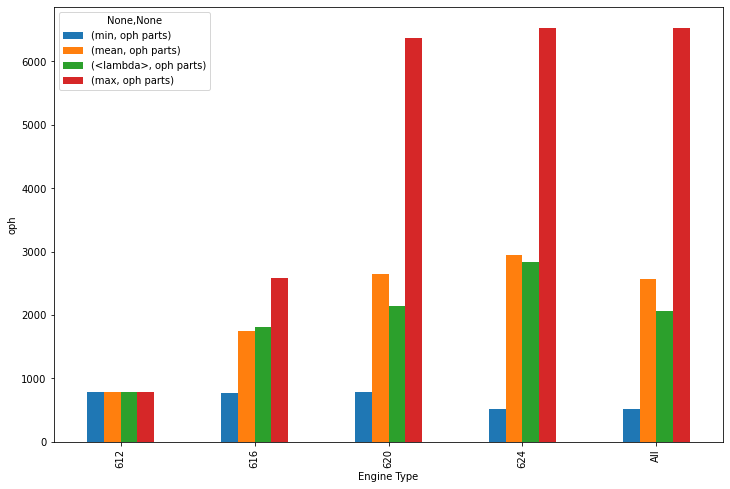

In [81]:
d.pivot_table(index='Engine Type', values='oph parts', aggfunc=['min','mean',lambda x: np.percentile(x, 50),'max'], margins=True).plot.bar(figsize=(12,8), ylabel='oph')

<AxesSubplot:xlabel='Engine Type', ylabel='oph'>

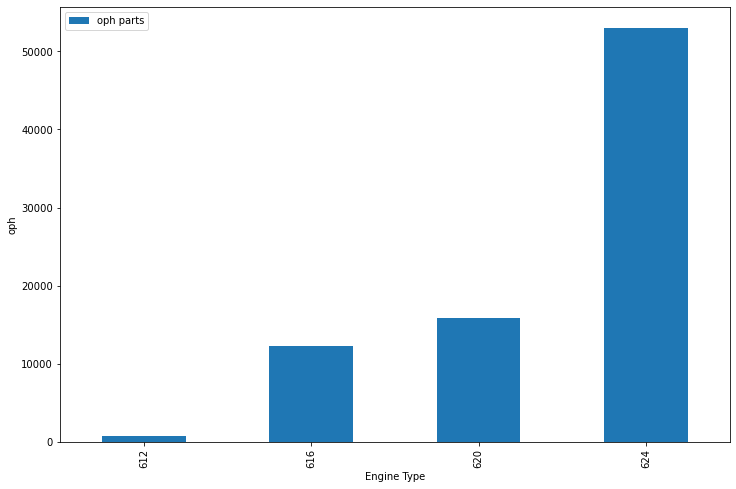

In [82]:
d.pivot_table(index='Engine Type', values='oph parts', aggfunc='sum', margins=False).plot.bar(figsize=(12,8), ylabel='oph')

<AxesSubplot:>

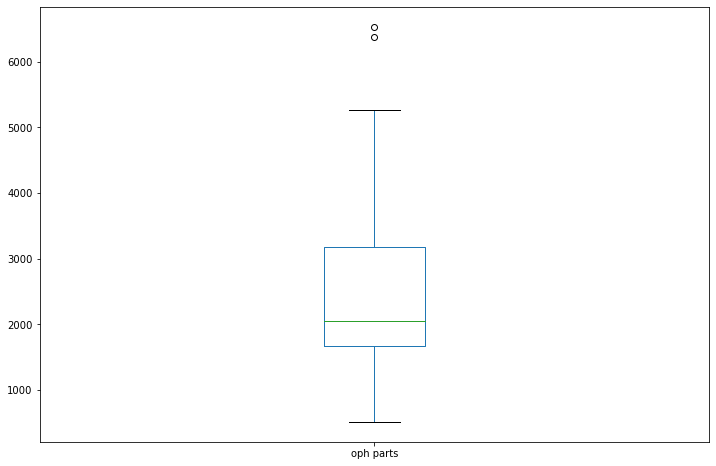

In [83]:
d[["oph parts"]].plot.box(figsize=(12,8))

In [84]:
d.melt()

,variable,value
0,Name,POLYNT - 2 (1145166-T241) --> Sept
1,Name,REGENSBURG
2,Name,ROCHE PENZBERG KWKK
3,Name,ECOGEN ENERGY SYSTEMS BVBA
4,Name,BMW REGENSBURG M3
...,...,...
379,oph parts,6535
380,oph parts,3479
381,oph parts,6371
382,oph parts,1593
